In [2]:
import numpy as np
import matplotlib.pyplot as plt
import random
from sklearn.manifold import MDS
from sklearn.cluster import KMeans
from scipy.cluster import hierarchy
from sklearn.decomposition import PCA
from scipy.spatial.distance import squareform
from collections import defaultdict

In [3]:
data = np.load("data/mds-population.npz")
print(data['D'])
print(data['population_list'])

[[  0.  87.  12. ... 462. 559. 553.]
 [ 87.   0.  87. ... 210. 359. 285.]
 [ 12.  87.   0. ... 317. 401. 377.]
 ...
 [462. 210. 317. ...   0. 226. 173.]
 [559. 359. 401. ... 226.   0. 127.]
 [553. 285. 377. ... 173. 127.   0.]]
[b'Bantu' b'E. Afncan' b'Nilo-Saharan' b'W. African' b'San' b'Barter'
 b'Mbuti' b'Indian' b'Iranian' b'Near Eastern' b'Uralic' b'Ainu'
 b'Japanese' b'Korean' b'Mon Khmer' b'Thai' b'Dravidian' b'Mongol Tungus'
 b'Tibetan' b'Indonesian' b'Malaysian' b'Filipino' b'N. Turkic'
 b'S. Chinese' b'Basque' b'Lapp' b'Sardinian' b'Danish' b'English'
 b'Greek' b'Italian' b'C Amerind' b'Eskimo' b'Na-Dene' b'N. American'
 b'S. American' b'Chukchi' b'Melanesian' b'Micronesian' b'Polynesian'
 b'New Guinean' b'Australian']


In [7]:
for n in range(2, 21):
    pca = PCA(n_components=n)
    pca.fit(data['D'])
    print(n, end=': ')
    print(pca.explained_variance_ratio_, end=', sum=')
    print(sum(pca.explained_variance_ratio_))

2: [0.49629953 0.23668935], sum=0.7329888856122841
3: [0.49629953 0.23668935 0.11135298], sum=0.8443418694329179
4: [0.49629953 0.23668935 0.11135298 0.08468892], sum=0.9290307872928206
5: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171 ], sum=0.952047884815564
6: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171  0.01068548], sum=0.9627333635023602
7: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171  0.01068548
 0.00727251], sum=0.9700058780250154
8: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171  0.01068548
 0.00727251 0.00531004], sum=0.9753159222542381
9: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171  0.01068548
 0.00727251 0.00531004 0.00391721], sum=0.9792331357553549
10: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171  0.01068548
 0.00727251 0.00531004 0.00391721 0.00346109], sum=0.9826942232740216
11: [0.49629953 0.23668935 0.11135298 0.08468892 0.0230171  0.01068548
 0.00727251 0.00531004 0.00391721 0.00346109 0.00279506], sum=0.985489

In [4]:
mds = MDS(n_components=2,n_init=500, dissimilarity="precomputed",n_jobs=-1,random_state=42)
m2 = mds.fit_transform(data['D'])
x = m2[:,0]
y = m2[:,1]

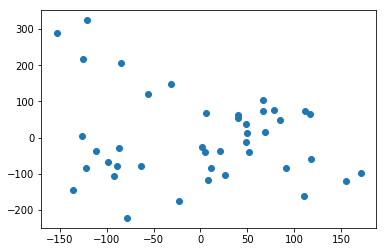

In [5]:
fig, ax = plt.subplots()
ax.scatter(x=x,y=y)

In [6]:
for i, txt in enumerate(data['population_list']):
    ax.annotate(str(txt), (x[i], y[i]))
fig.savefig("scatter")
fig.clf()

for i in range(len(data['population_list'])):
    ax.annotate(str(data['population_list'][i]), (x[i], y[i]))

In [7]:
km = KMeans(n_clusters=3, random_state=42).fit(m2)
color = km.labels_
color_dict = {0:'red', 1:'blue', 2:'green'}

In [8]:
fig, ax = plt.subplots()
ax.scatter(x=x,y=y,color=[color_dict[c] for c in color])
for i, txt in enumerate(data['population_list']):
    ax.annotate(str(txt), (x[i], y[i]))
fig.savefig('3-means')
fig.clf()

<Figure size 432x288 with 0 Axes>

In [9]:
z = hierarchy.linkage(squareform(data['D']), 'ward')

In [10]:
print(z)

[[ 27.          28.           3.           2.        ]
 [ 14.          15.          10.           2.        ]
 [  8.          29.          11.           2.        ]
 [ 10.          17.          11.           2.        ]
 [  0.           2.          12.           2.        ]
 [ 30.          42.          13.79613472   3.        ]
 [ 31.          35.          20.           2.        ]
 [ 12.          13.          22.           2.        ]
 [ 23.          43.          23.02172887   3.        ]
 [  3.          46.          27.44691847   3.        ]
 [  9.          44.          29.44486373   3.        ]
 [ 24.          47.          31.54626232   4.        ]
 [ 19.          21.          42.           2.        ]
 [ 16.          18.          42.           2.        ]
 [ 34.          48.          47.32863826   3.        ]
 [  7.          52.          49.42165517   4.        ]
 [ 22.          36.          51.           2.        ]
 [ 11.          49.          52.68143253   3.        ]
 [  5.    

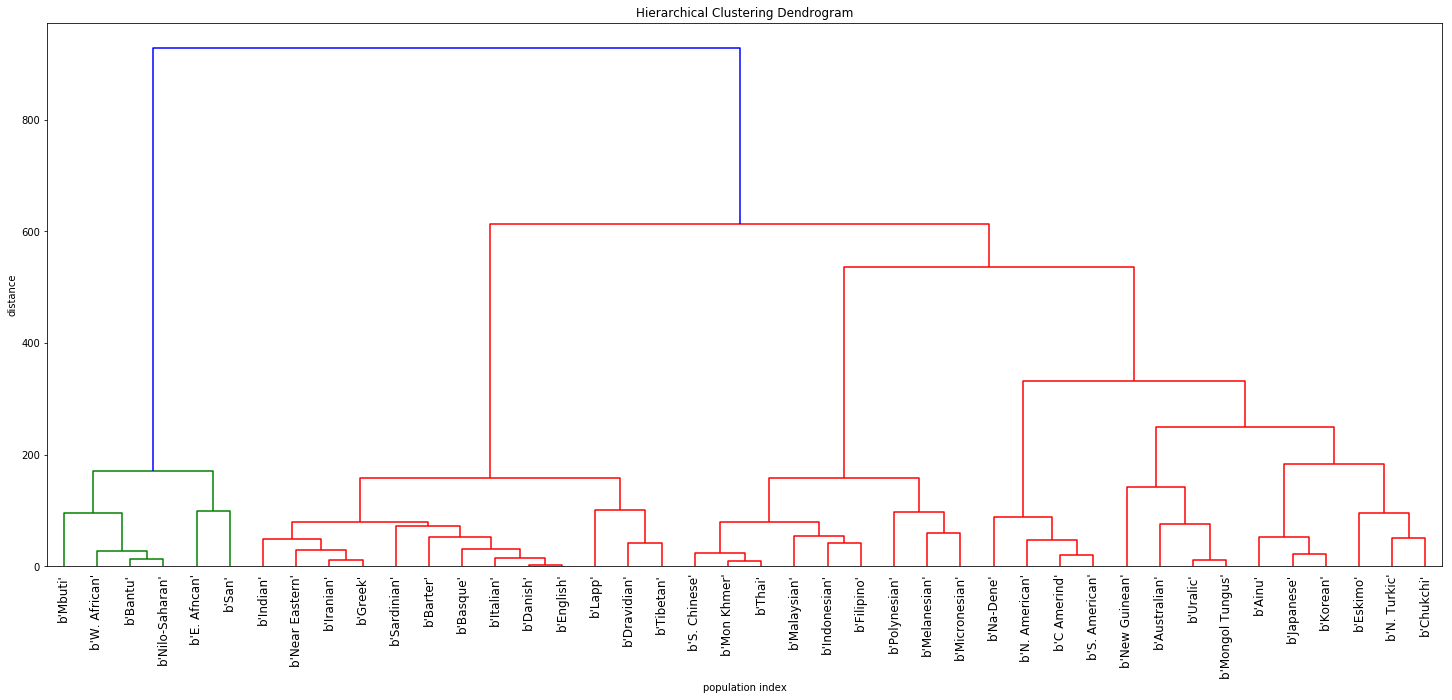

In [11]:
# calculate full dendrogram
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('population index')
plt.ylabel('distance')
hierarchy.dendrogram(
    z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=12,  # font size for the x axis labels
    labels=data['population_list']
)
plt.savefig('dendrogram')

In [12]:
clusters = hierarchy.fcluster(z, t=3,criterion='maxclust')
category = defaultdict(list)
for (i, c) in enumerate(clusters):
    category[c].append(data['population_list'][i])
for c in category.values():
    print(c)

[b'Bantu', b'E. Afncan', b'Nilo-Saharan', b'W. African', b'San', b'Mbuti']
[b'Barter', b'Indian', b'Iranian', b'Near Eastern', b'Dravidian', b'Tibetan', b'Basque', b'Lapp', b'Sardinian', b'Danish', b'English', b'Greek', b'Italian']
[b'Uralic', b'Ainu', b'Japanese', b'Korean', b'Mon Khmer', b'Thai', b'Mongol Tungus', b'Indonesian', b'Malaysian', b'Filipino', b'N. Turkic', b'S. Chinese', b'C Amerind', b'Eskimo', b'Na-Dene', b'N. American', b'S. American', b'Chukchi', b'Melanesian', b'Micronesian', b'Polynesian', b'New Guinean', b'Australian']


In [13]:
fig, ax = plt.subplots()
ax.scatter(x=x,y=y,color=[color_dict[c-1] for c in clusters])
for i, txt in enumerate(data['population_list']):
    ax.annotate(str(txt), (x[i], y[i]))
fig.savefig('hierarchical 3 clusters')
fig.clf()

<Figure size 432x288 with 0 Axes>

In [14]:
# the following code is borrowed from https://github.com/salspaugh/machine_learning/blob/master/clustering/kmedoids.py
random.seed(0)
def k_medoids(distances, k=3):

    m = distances.shape[0] # number of points

    # Pick k random medoids.
    curr_medoids = np.array([-1]*k)
    while not len(np.unique(curr_medoids)) == k:
        curr_medoids = np.array([random.randint(0, m - 1) for _ in range(k)])
    old_medoids = np.array([-1]*k) # Doesn't matter what we initialize these to.
    new_medoids = np.array([-1]*k)
   
    # Until the medoids stop updating, do the following:
    while not ((old_medoids == curr_medoids).all()):
        # Assign each point to cluster with closest medoid.
        clusters = assign_points_to_clusters(curr_medoids, distances)

        # Update cluster medoids to be lowest cost point. 
        for curr_medoid in curr_medoids:
            cluster = np.where(clusters == curr_medoid)[0]
            new_medoids[curr_medoids == curr_medoid] = compute_new_medoid(cluster, distances)

        old_medoids[:] = curr_medoids[:]
        curr_medoids[:] = new_medoids[:]

    return clusters, curr_medoids

def assign_points_to_clusters(medoids, distances):
    distances_to_medoids = distances[:,medoids]
    clusters = medoids[np.argmin(distances_to_medoids, axis=1)]
    clusters[medoids] = medoids
    return clusters

def compute_new_medoid(cluster, distances):
    mask = np.ones(distances.shape)
    mask[np.ix_(cluster,cluster)] = 0.
    cluster_distances = np.ma.masked_array(data=distances, mask=mask, fill_value=10e9)
    costs = cluster_distances.sum(axis=1)
    return costs.argmin(axis=0, fill_value=10e9)

In [15]:
medoid_cluster, medoids = k_medoids(data['D'],3)

In [16]:
medoids = list(medoids)
for i in range(len(medoid_cluster)):
    medoid_cluster[i] = medoids.index(medoid_cluster[i])

In [17]:
plt.scatter(x=x,y=y,color=[color_dict[c] for c in medoid_cluster])
for i, txt in enumerate(data['population_list']):
    plt.annotate(str(txt), (x[i], y[i]))
plt.savefig('3-medoids')
plt.clf()

<Figure size 432x288 with 0 Axes>